In [56]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
tfds.__version__

'2.0.0'

In [3]:
print ('\n'.join(tfds.list_builders()))

abstract_reasoning
aeslc
aflw2k3d
amazon_us_reviews
arc
bair_robot_pushing_small
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
c4
caltech101
caltech_birds2010
caltech_birds2011
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
chexpert
cifar10
cifar100
cifar10_1
cifar10_corrupted
citrus_leaves
cityscapes
civil_comments
clevr
cmaterdb
cnn_dailymail
coco
coil100
colorectal_histology
colorectal_histology_large
cos_e
curated_breast_imaging_ddsm
cycle_gan
deep_weeds
definite_pronoun_resolution
diabetic_retinopathy_detection
dmlab
downsampled_imagenet
dsprites
dtd
duke_ultrasound
dummy_dataset_shared_generator
dummy_mnist
emnist
esnli
eurosat
fashion_mnist
flic
flores
food101
gap
gigaword
glue
groove
higgs
horses_or_humans
i_naturalist2017
image_label_folder
imagenet2012
imagenet2012_corrupted
imagenet_resized
imagenette
imdb_reviews
iris
kitti
kmnist
lfw
lm1b
lost_and_found
lsun
malaria
math_dataset
mnist
mnist_corrupted
movie_rationales
moving_mnist
multi_news
multi_nli


# Create a model that converts ºC to ºF

In [4]:
# Defines the conversion data for the model to learn from.
celcius = [-40, -10, 0, 8, 15, 22, 38]
fahrenheit = [-40, 14, 32, 46, 59, 72, 100]

In [5]:
model = tf.keras.Sequential()
# One is required to construct a final layer, as the output layer.

In [6]:
model.add(tf.keras.layers.Dense(4,
                                input_shape=[1]))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1,
#                                 input_shape=[1]))

$T_{f}$ = $T_{c}$ $\times$ $\frac{9}{5}$ + 32
9/5 is the parameter, 32 is the bias

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
    loss="mse"
)

In [9]:
history = model.fit(celcius, fahrenheit, epochs=500, verbose=0)

In [10]:
model.predict([100])

array([[211.74744]], dtype=float32)

In [11]:
model.get_weights()

[array([[ 0.25015008,  0.08947237, -0.59580964,  0.10745055]],
       dtype=float32),
 array([ 2.7249622,  2.5666418, -2.8233354,  2.554434 ], dtype=float32),
 array([[-0.24310884, -0.08600795, -0.58551186,  0.6128311 ],
        [ 0.4185939 ,  0.93029094,  0.03872897,  1.0416238 ],
        [ 0.23328283, -0.47172388,  0.02634076, -1.0008149 ],
        [-0.1250134 , -0.0196386 , -0.79031265,  0.3688549 ]],
       dtype=float32),
 array([ 1.1845456,  2.7231338, -2.7024062,  2.7782745], dtype=float32),
 array([[ 0.29383582],
        [ 0.810109  ],
        [-1.4028482 ],
        [ 1.3960044 ]], dtype=float32),
 array([2.753902], dtype=float32)]

Text(0, 0.5, 'Loss')

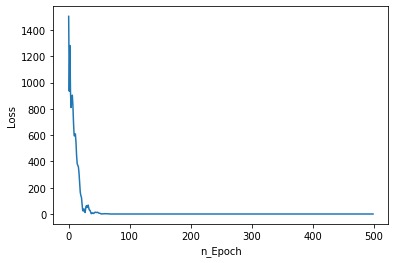

In [12]:
plt.plot(history.history['loss'])
plt.xlabel('n_Epoch')
plt.ylabel('Loss')